<a href="https://colab.research.google.com/github/masrur-saqib/masrur-saqib/blob/main/Feature_extraction_efficient%20pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d grassknoted/asl-alphabet
!mkdir DATASET
!unzip -q asl-alphabet.zip -d DATASET

In [ ]:
!kaggle datasets download -d danrasband/asl-alphabet-test


 21% 5.00M/24.3M [00:00<00:00, 44.7MB/s]
100% 24.3M/24.3M [00:00<00:00, 134MB/s] 


In [ ]:
!mkdir DATASET
!unzip -q asl-alphabet-test.zip -d DATASET

# Mediapipe

In [ ]:
!pip install mediapipe
!pip install opencv-python

# Single Hand

In [ ]:
import cv2
import mediapipe as mp
import os
import csv

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

In [ ]:
image = cv2.imread('/content/DATASET/A/A0001_test.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and extract hand landmarks
results = hands.process(image_rgb)

# Check if hand landmarks are detected
if results.multi_hand_landmarks:
    # Get landmarks for the first hand (assuming one hand in each image)
    landmarks = results.multi_hand_landmarks[0].landmark
    print('done')

    # Convert landmarks to list of coordinates
    landmark_coordinates = []
    for landmark in landmarks:
        landmark_coordinates.append((landmark.x, landmark.y, landmark.z))

done


In [ ]:
landmark_coordinates

[(0.3323798179626465, 0.6285103559494019, -9.896045867208159e-07),
 (0.4906632900238037, 0.614133358001709, -0.05272448807954788),
 (0.64654940366745, 0.5053519606590271, -0.06849782913923264),
 (0.7088634967803955, 0.3803977072238922, -0.08379750698804855),
 (0.7510969042778015, 0.28102612495422363, -0.09196872264146805),
 (0.5958228707313538, 0.3340708315372467, -0.028744082897901535),
 (0.6421917676925659, 0.23224425315856934, -0.1092316284775734),
 (0.6036808490753174, 0.3358728885650635, -0.14989909529685974),
 (0.5682122111320496, 0.4303604066371918, -0.16021192073822021),
 (0.4959283471107483, 0.3083312213420868, -0.030829012393951416),
 (0.5522118806838989, 0.19199271500110626, -0.12388639152050018),
 (0.5163928866386414, 0.3369980454444885, -0.14665688574314117),
 (0.4860507547855377, 0.44972655177116394, -0.13408036530017853),
 (0.39486217498779297, 0.3023861050605774, -0.04445387050509453),
 (0.43753618001937866, 0.2028302699327469, -0.14248745143413544),
 (0.420864999294281

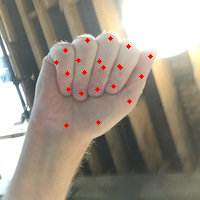

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Read the image
image = cv2.imread('/content/DATASET/A/A0001_test.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Process the image and extract hand landmarks
results = hands.process(image_rgb)

# Check if hand landmarks are detected
if results.multi_hand_landmarks:
    # Get landmarks for the first hand (assuming one hand in each image)
    landmarks = results.multi_hand_landmarks[0].landmark

    # Draw circles on the image at the locations of hand landmarks
    for i, landmark in enumerate(landmarks):
        h, w, _ = image.shape
        cx, cy = int(landmark.x * w), int(landmark.y * h)
        cv2.circle(image, (cx, cy), 2, (0, 0, 255), -1)  # Draw a circle at each landmark location

        # Display landmark data
        # cv2.putText(image, f"{i+1}: ({cx}, {cy})", (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 0, 255), 1)

    # Display the image with hand landmarks
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("No hand landmarks detected.")


# Whole dataset

In [ ]:
import cv2
import mediapipe as mp
import os
import csv

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Function to process an image and extract hand landmarks
def extract_hand_landmarks(image_path):
    # Read the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image and extract hand landmarks
    results = hands.process(image_rgb)

    # Check if hand landmarks are detected
    if results.multi_hand_landmarks:
        # Get landmarks for the first hand (assuming one hand in each image)
        landmarks = results.multi_hand_landmarks[0].landmark

        # Convert landmarks to list of coordinates
        landmark_coordinates = []
        for landmark in landmarks:
            landmark_coordinates.append((landmark.x, landmark.y, landmark.z))

        return landmark_coordinates

# Replace 'your_image_folder_path' with the path to your dataset folder
dataset_folder_path = './DATASET/'




In [ ]:
from tqdm import tqdm

In [ ]:
csv_file_path = 'hand_landmarks_test.csv'

with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Write the header row
    header = ["Landmark_" + str(i) for i in range(1, 22)] + ["Class"]
    writer.writerow(header)

    # Loop through each class (subfolder) in the dataset folder
    for class_name in os.listdir(dataset_folder_path):
        class_folder_path = os.path.join(dataset_folder_path, class_name)

        # Loop through each image in the class folder
        for filename in os.listdir(class_folder_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(class_folder_path, filename)
                # print(f"Processing {image_path}")

                landmarks = extract_hand_landmarks(image_path)

                if landmarks:
                    # Write landmarks and class name to the CSV file
                    landmarks.append(class_name)
                    writer.writerow(landmarks)